MonteCarlo simulation for geometricl efficiency estimation

In [91]:
import numpy as np
from scipy import special as sp
from scipy import constants as c
import matplotlib.pyplot as plt

In [92]:
core_diam = 8.2*1e-6 # meters
lenght = 1 # meters
lam = 1555 * 1e-9 #meters

First we have to compute the number of photons coming out of the diode

In [93]:
P = 1.5*1e-3 #diode power
R0 = (P*lam)/(c.Planck*c.c) # photons per second

Then we have to account for 1m lenght of fiber

In [94]:
fiber_att = pow(10,(0.18/20))*lenght/1000 #W per m
R_in = R0*fiber_att*1e-9 #rate of photons out of fiber in 1 ns

Airy diffraction formula

In [102]:
def airy(theta):
    a=core_diam
    k = 2*np.pi/lam
    x = k*a*np.sin(theta)
    return (2*sp.j1(x)/x)**2

def intensity(r):
    return pow(r,-2)

In [113]:
ang = np.arange(0,61,1)*np.pi/180
z = np.arange(1.1,62.1,1)
R_out = R_in*airy(ang)
radius = intensity(z)*100

C:\Users\ricca\AppData\Local\Temp\ipykernel_19404\2071040211.py:5: RuntimeWarning: invalid value encountered in divide
  return (2*sp.j1(x)/x)**2


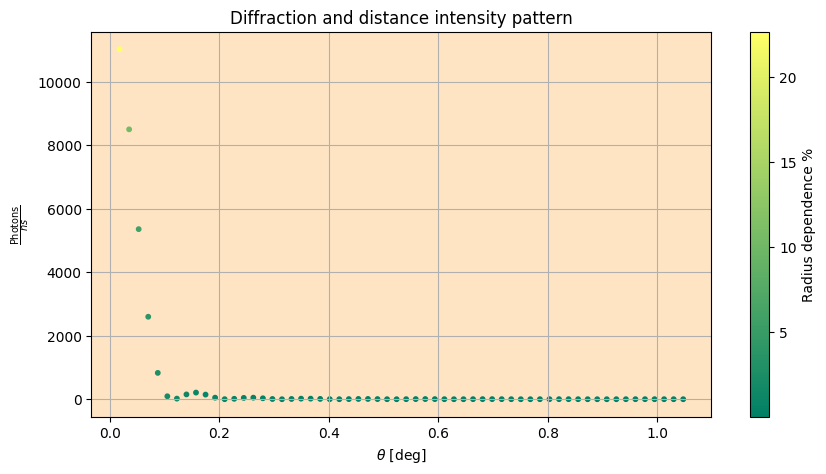

In [117]:
fig, axs = plt.subplots(figsize=(10,5))
plt.scatter(ang, R_out, c=radius, marker='o',s=10, cmap='summer')
plt.title("Diffraction and distance intensity pattern")
plt.xlabel(r"$\theta$ [deg]")
plt.ylabel(r"$\frac{\text{Photons}}{ns}$")
plt.grid()
axs.set_facecolor('bisque')
plt.colorbar(label="Radius dependence %", orientation="vertical") 
